# Task 3 : Exploratory Data Analysis - Retail
# `Goals`: 
- Per form ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
- As a business manager, try to find out the weak areas where you can work to make more profit. 
- What all business problems you can derive by exploring the  data?

## 1. Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 

import seaborn as sns
%matplotlib inline

## 2. Looking at the Dataset. 

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
print(f'Features : {df.keys()}')


Features : Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [3]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 3. Dropping the Unnecessary columns.

In [4]:
df.reset_index(drop=True)
df= df.drop(['Postal Code', 'Sales','Quantity','Discount','Country'], axis=1)

## 4. As, We want to Maximize the profit, we will focus on where we are getting profits.

In [5]:
profits = df.loc[df['Profit']>0].reset_index(drop=True)
profits.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2.5164
4,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,14.1694


## 5. Helper functions to find Category-wise Profit and ploting graphs. 

In [6]:
mode, segments, category, sub_category, city, states =  [], [], [], [], [], []
def find_profit(array_name, var_name, column_name, dataframe):
    var_name = dataframe[column_name].unique()
    for i in range(len(var_name)):
        temp = dataframe.loc[dataframe[column_name] == var_name[i]]['Profit'].max()
        array_name.append((var_name[i], temp))
    df = pd.DataFrame(array_name, )
    return df
def bar_plot(array_name,title, xlabel, ylabel):
    plt.figure(figsize=(12,10))
    plots = sns.barplot(x=array_name[0], y=array_name[1], data=array_name)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    plt.xticks(rotation='vertical')
    plt.title(title, size=15)
    plt.xlabel(xlabel, size=10)
    plt.ylabel(ylabel, size=10)
    plt.show()

In [7]:
mode = find_profit(mode, 'modes', 'Ship Mode', profits)
segments = find_profit(segments, 'segments', 'Segment', profits)
category = find_profit(category, 'category', 'Category', profits)
sub_category = find_profit(sub_category, 'sub_category', 'Sub-Category', profits)
city = find_profit(city, 'city', 'City', profits)
states = find_profit(states, 'states', 'State', profits)

## 6. Category Wise Data Visualization

### i. City wise profit

In [8]:
city[1].describe()

count     513.000000
mean      268.126658
std       717.944163
min         0.154800
25%        24.316000
50%        79.692000
75%       219.654600
max      8399.976000
Name: 1, dtype: float64

### As we can see, the mean profit is $268.13$$  from  513 Cities.
### We will consider the cities where profit is atleast $500$$ 

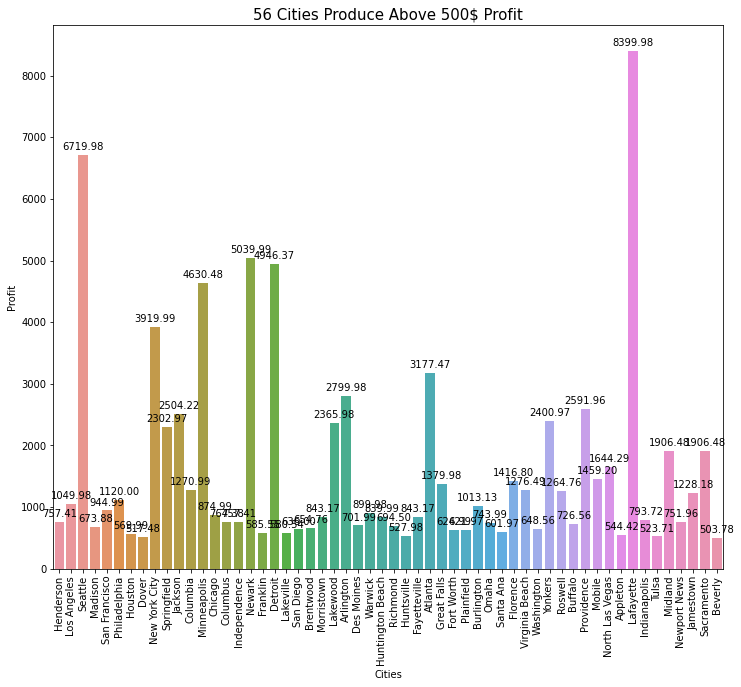

In [9]:

bar_plot(city.loc[city[1]>500], f'{city.loc[city[1]>500].count()[0]} Cities Produce Above 500$ Profit',  'Cities','Profit')

### ii. State wise profit

In [10]:
states[1].describe()

count      49.000000
mean     1424.496976
std      1830.217219
min       100.196000
25%       294.671000
50%       624.987500
75%      1644.291300
max      8399.976000
Name: 1, dtype: float64

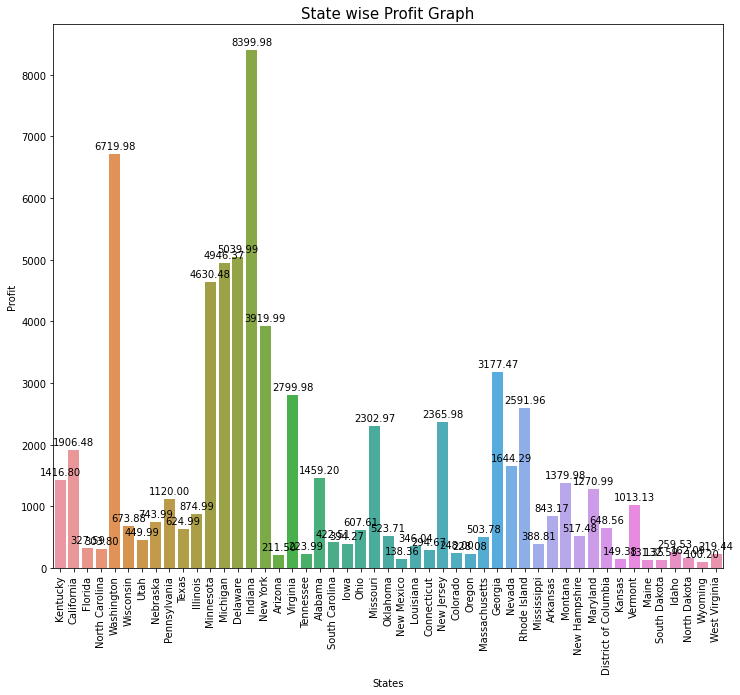

In [11]:
bar_plot(states, 'State wise Profit Graph', 'States', 'Profit')

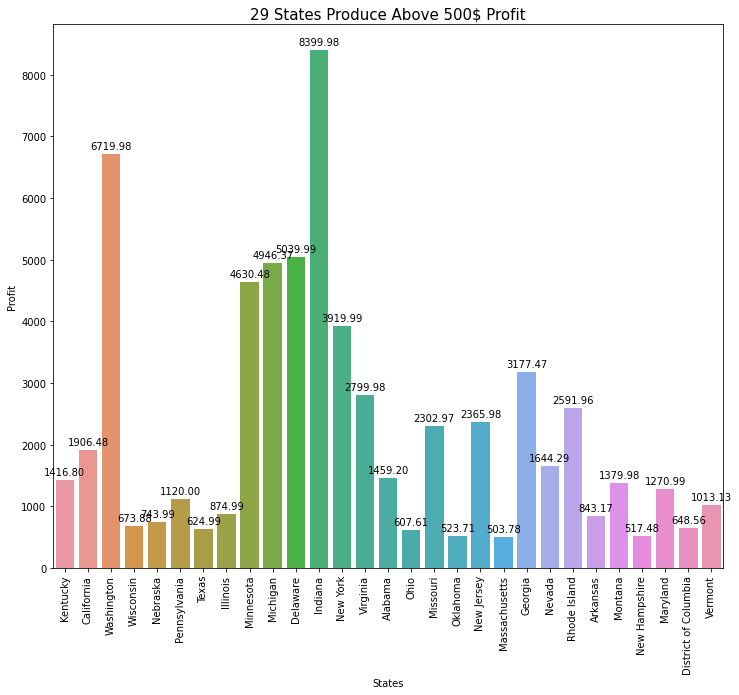

In [12]:
bar_plot(states.loc[states[1]>500], f'{states.loc[states[1]>500].count()[0]} States Produce Above 500$ Profit', 'States', 'Profit')

### iii. Shipping Mode wise profit

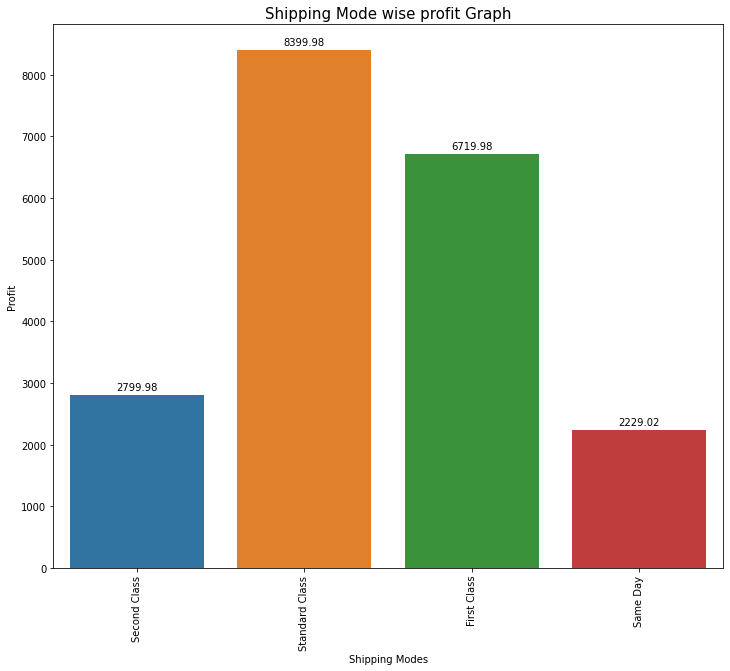

In [13]:
bar_plot(mode, 'Shipping Mode wise profit Graph', 'Shipping Modes', 'Profit')

## As we can see, `Standard Class` & `First Class` Shipping modes are most profitable.

### iv. Segment wise profit

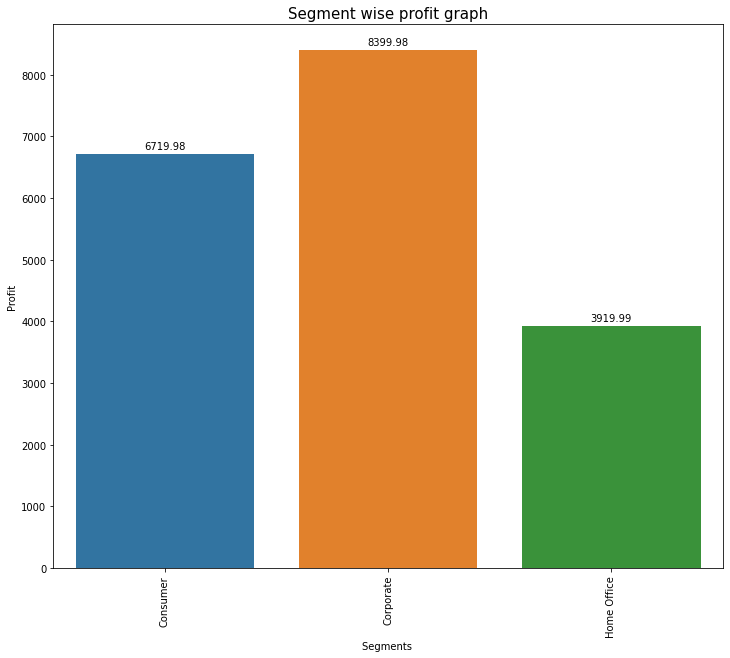

In [14]:
bar_plot(segments, 'Segment wise profit graph','Segments ', 'Profit')

## As we can see, `Corporate` & `Consumer` Segments are most profitable.

### v. Category wise profit

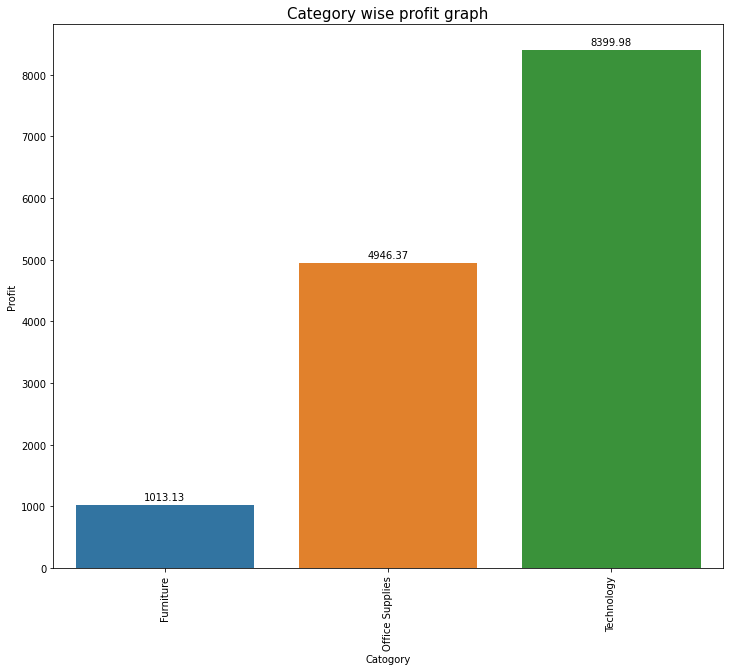

In [15]:
bar_plot(category, 'Category wise profit graph', 'Catogory', 'Profit')

## As we can see, `Technology` Category is the most profitable one.

### vi. Sub Catogory wise profit.

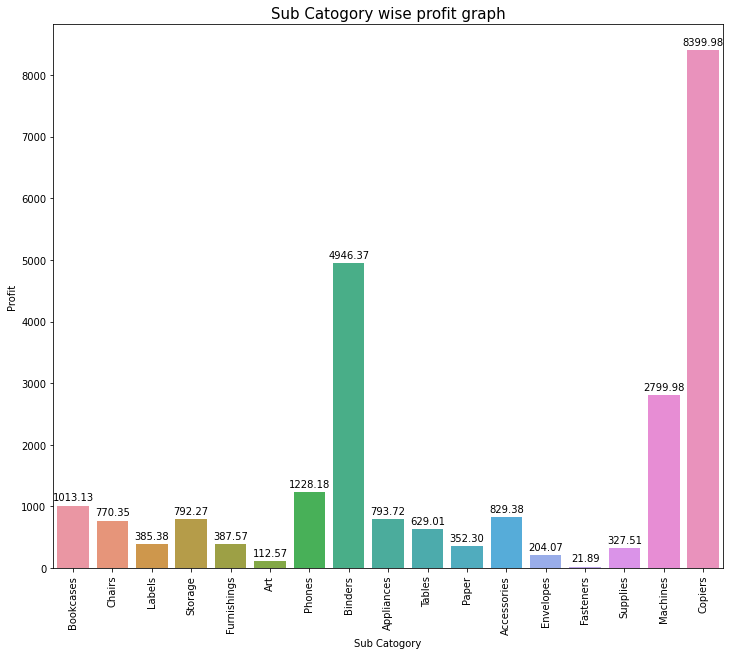

In [16]:
bar_plot(sub_category, 'Sub Catogory wise profit graph', 'Sub Catogory', 'Profit')

## As we can see, `Copiers`, `Blinders` & `Machines` sub-categories are most profitable.

## If we make appropriate decision according to the analysis, the retail store can make more profit then before.